# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [195]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
# s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


In [196]:
def getCitiBikeCSV(datestring):
    """
    looks for existing files, download a file if none is there, unzips it, moves it
    """
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [197]:
#significance level
alpha = 0.05

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [198]:
datestring1 = '201501' #colder
getCitiBikeCSV(datestring1)
datestring2 = '201506' #warmer
getCitiBikeCSV(datestring2)

('Downloading', '201501')
file in place, you can continue
('Downloading', '201506')
file in place, you can continue


In [199]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [200]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [201]:
df1.shape, df2.shape

((285552, 15), (941219, 15))

In [202]:
df = pd.concat((df1, df2), axis=0)
df.shape

(1226771, 15)

In [203]:
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.226771e+06,1.226771e+06,1.226771e+06,1.226771e+06,1.226771e+06,1.226771e+06,1.226771e+06,1.226771e+06,1.090751e+06,1.226771e+06
mean,8.463465e+02,4.561577e+02,4.073500e+01,-7.399105e+01,4.540858e+02,4.073470e+01,-7.399120e+01,1.816818e+04,1.975921e+03,1.084841e+00
std,3.052017e+03,3.730900e+02,1.923260e-02,1.226162e-02,3.707375e+02,1.919737e-02,1.228086e-02,2.102264e+03,1.150760e+01,5.481352e-01
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.810000e+02,3.070000e+02,4.072182e+01,-7.400004e+01,3.060000e+02,4.072165e+01,-7.400026e+01,1.636700e+04,NaN,1.000000e+00
50%,6.050000e+02,4.170000e+02,4.073653e+01,-7.399076e+01,4.120000e+02,4.073650e+01,-7.399093e+01,1.815600e+04,NaN,1.000000e+00
75%,9.920000e+02,4.920000e+02,4.075020e+01,-7.398195e+01,4.910000e+02,4.074972e+01,-7.398195e+01,1.993100e+04,NaN,1.000000e+00
max,1.691873e+06,3.002000e+03,4.077152e+01,-7.395005e+01,3.002000e+03,4.077152e+01,-7.395005e+01,2.236400e+04,1.999000e+03,2.000000e+00


In [204]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# Task 1: SPLIT BY CATEGORY
## Use: trip duration of bikers that ride during the day vs night. 
**H0: there is no statistical difference in the trip duration distribution of day and night riders**
$$ \alpha = 0.05 $$

In [205]:
df['hour'] = df['date'].dt.hour
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,0


In [206]:
#split day from 6 to 18 and night from 18 to 6
def day(d, h):
    if (h > 5) & (h < 19):
        return d
    else:
        return NaN

df['DayTrip'] = df.apply(lambda x: day(x.tripduration, x.hour), axis=1)
df['DayTrip'].dropna(inplace= True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,DayTrip
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0,NaN
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,0,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,0,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,0,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,0,NaN


In [207]:
def night(d, h):
    if (h < 6) | (h > 18):
        return d
    else:
        return NaN
df['NightTrip'] = df.apply(lambda x: night(x.tripduration, x.hour), axis=1)
df['NightTrip'].dropna(inplace= True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,DayTrip,NightTrip
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0,NaN,1346.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,0,NaN,363.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,0,NaN,346.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,0,NaN,182.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,0,NaN,969.0


In [208]:
# dropping no need columns
df.drop(['starttime', 'stoptime','start station id', 'start station latitude', 'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'gender','birth year', 'date'], axis=1, inplace=True)
df.head()

,tripduration,start station name,hour,DayTrip,NightTrip
0,1346,1 Ave & E 44 St,0,NaN,1346.0
1,363,9 Ave & W 18 St,0,NaN,363.0
2,346,E 24 St & Park Ave S,0,NaN,346.0
3,182,Fulton St & Waverly Ave,0,NaN,182.0
4,969,5 Ave & E 29 St,0,NaN,969.0


In [209]:
df.describe()

,tripduration,hour,DayTrip,NightTrip
count,1.226771e+06,1.226771e+06,9.655420e+05,261229.000000
mean,8.463465e+02,1.390772e+01,8.491570e+02,835.958504
std,3.052017e+03,4.939333e+00,3.172780e+03,2556.600729
min,6.000000e+01,0.000000e+00,6.000000e+01,60.000000
25%,3.810000e+02,1.000000e+01,NaN,NaN
50%,6.050000e+02,1.500000e+01,NaN,NaN
75%,9.920000e+02,1.800000e+01,NaN,NaN
max,1.691873e+06,2.300000e+01,1.691873e+06,510246.000000


In [210]:
df['DayTrip'].dropna(inplace= True)
df['NightTrip'].dropna(inplace= True)
df.head()

,tripduration,start station name,hour,DayTrip,NightTrip
0,1346,1 Ave & E 44 St,0,NaN,1346.0
1,363,9 Ave & W 18 St,0,NaN,363.0
2,346,E 24 St & Park Ave S,0,NaN,346.0
3,182,Fulton St & Waverly Ave,0,NaN,182.0
4,969,5 Ave & E 29 St,0,NaN,969.0


In [211]:
print ("Number of daytime rides", df.DayTrip.sum())
print ("Number of nighttime rides", df.NightTrip.sum())

('Number of daytime rides', 819896702.0)
('Number of nighttime rides', 218376604.0)


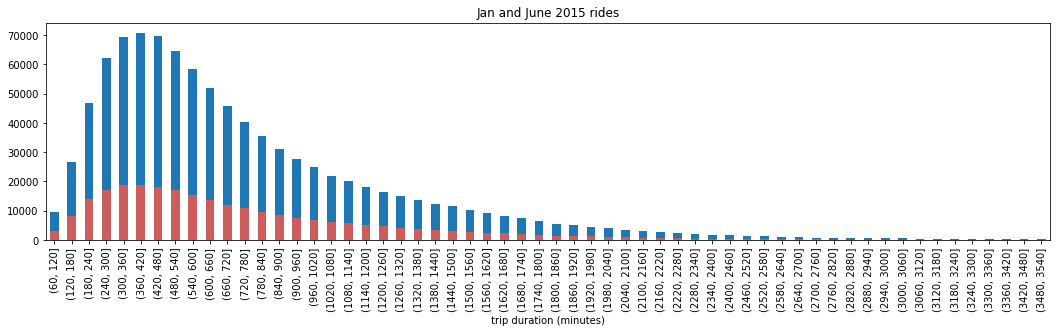

In [212]:
# split trip duration in 60 second bins and show all data within an hour
# bins = np.arange(60, 3600, 60)

#dayax = df.DayTrip.groupby(pd.cut(df.DayTrip, bins)).agg([count_nonzero]).plot(kind='bar', legend=False, figsize=(18, 4))
#dayax.set_title("Daytime Bikers")
#nightax = df.NightTrip.groupby(pd.cut(df.NightTrip, bins)).agg([count_nonzero]).plot(kind='bar', legend=False, figsize=(18, 4))
#nightax.set_title("Night Bikers")

pc = np.percentile(df.tripduration, [0, 99])
bins = np.arange(60, 3600, 60)
dayax = df.DayTrip.groupby(pd.cut(df.DayTrip, bins)).agg([count_nonzero]).plot(kind='bar', legend=False, figsize=(18, 4))
dayax.set_title("Jan and June 2015 rides")
# plot nighttime trip duration histogram
df.NightTrip.groupby(pd.cut(df.NightTrip, bins)).agg([count_nonzero]).plot(kind='bar', legend=False, ax=dayax, color='IndianRed')
xlab = dayax.get_xticklabels()
dayax.set_xticklabels(['' if float(i)%1 > 0 else xlab[i] for i in range(len(xlab))]);
dayax.set_xlabel(" trip duration (minutes) ")

**Figure 1: histogrammed distribution of trip duration of bikers by day and night, which shows generally night trips(red) are much fewer than day trips(blue) **

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

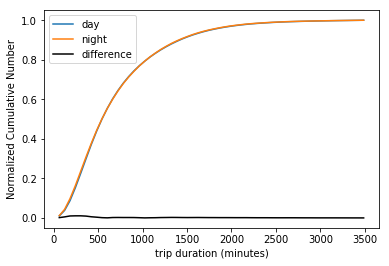

In [213]:
csD = df.DayTrip.groupby(pd.cut(df.DayTrip, bins)).agg([count_nonzero]).cumsum()

csN = df.NightTrip.groupby(pd.cut(df.NightTrip, bins)).agg([count_nonzero]).cumsum()

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "night")
pl.plot(bins[:-1] + 5, np.abs(csN / csN.max() - csD / csD.max()), 'k-', label = "difference")
pl.xlabel("trip duration (minutes)")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of trip duration of bikers by day and night, which shows the difference is really small(much less than 10%).**

lets run the scipy KS test

In [214]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# Task 2: KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

Null Hypothesis: The two samples are generated from the same distribution

In [215]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
ks = scipy.stats.ks_2samp(df.DayTrip[~np.isnan(df.DayTrip)], df.NightTrip[~np.isnan(df.NightTrip)])
print (ks)
if ks[1] >= alpha: 
    print ("Fail to rejct the Null hypothesis (p>=0.05)")
else: 
    print ("Reject the Null hypothesis (p<0.05)")

Ks_2sampResult(statistic=0.012348744160654748, pvalue=1.1323867007965436e-27)
Reject the Null hypothesis (p<0.05)


# Task 3: Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



Null Hypothesis: The two samples are generated from the uncorrelated distribution

In [216]:
# more day trips than night trips, make the sample size consistent 
#length = min(df.DayTrip.shape[0], df.NightTrip.shape[0])
#df.head()

In [217]:
#np.random.seed(999)
#df=df.sample(frac=1)
#df.reindex(np.random.permutation(df.index))
#df.head()

##Does not work for big data!!!

In [218]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

length = max(len(df.DayTrip), len(df.NightTrip))

def padding(array): ## Quoted from Junru Lu(lj1230)
    if len(array) == length:
        return array
    else:
        return np.pad(array, (0, length - len(array)), 'mean')
    
parsons = scipy.stats.pearsonr(np.sort(padding(df.DayTrip)), np.sort(padding(df.NightTrip)))

print ("Parson's test result", parsons)
if parsons[1] >= alpha: 
    print ("Fail to rejct the Null hypothesis (p>=0.05)")
else: 
    print ("Reject the Null hypothesis (p = %.3f<0.05)"%parsons[1])

("Parson's test result", (0.95474466013851411, 0.0))
Reject the Null hypothesis (p = 0.000<0.05)


**The returns are Pearson’s correlation coefficient and 2-tailed Pvalue. The pvalue is smaller than significant value 0.05, which shows that we can reject the null hypothesis that two samples are generated from the uncorrelated distribution.**

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [219]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

spearmanr = scipy.stats.spearmanr(np.sort(padding(df.DayTrip)), np.sort(padding(df.NightTrip)))
print ("Spearman's r test result", spearmanr)
if spearmanr[1] >= alpha: 
    print ("Fail to rejct the Null hypothesis (p>=0.05)")
else: 
    print ("Reject the Null hypothesis (p = %.3f<0.05)"%spearmanr[1])

("Spearman's r test result", SpearmanrResult(correlation=0.78221699810142176, pvalue=0.0))
Reject the Null hypothesis (p = 0.000<0.05)


**The returns are Spearman’s correlation coefficient and 2-tailed Pvalue. The pvalue is smaller than significant value 0.05, which shows that we can reject the null hypothesis that two samples are generated from the uncorrelated distribution.**